# Entrega Semana 3 Actividad 1
- Nombre: Erick Alexei Cambray Servin
- Matrícula: A01794243
- Nombre: Nicolás Mojica Gómez
- Matrícula: A01794354
- Materia : Ciencia y analítica de datos
- Grupo: 10
- Profesor: Jobish Vallikavungal
- Fecha 30 de Septiembre del 2022

## Parte 1: Fundamentos de bases de datos

Cuando trabajamos dentro del ámbito de ciencia de datos nos hemos cruzado  con distintos términos, los cuales se refieren a los procesos por los que pasa la información para por ser ocupada en un proceso produtivo que nos pueda ayudar a poder obtejer concluciones de la información que tenemos.

La primera parte del proceso es poder tener una fuente de información para poder con ella los análisis. El tener una forma de extrar esta información normalmente de un *Data Warehouse*. 

## Data Warehouse
Es una base de datos muy grande la cual puede adquirir su infromación de diversas fuentes y a la vez nos ayuda a relacionarlas para poder tomarla como una sola fuente.

El tipo de desafios a los que nos podemos enfrentar preparando el data warehousing son:
- Normalización: A pesar de que la data que se ha obtenido haya venido de diferentes fuentes, el objetivo es poder unficar sus variables para que estén ralacionadas entre ellas.
- Comparabilidad: Asegurarnos que una columna de una fuente de datos es comparable con la de otra fuente de datos por ejemplo si estamos comparando información poblacional entonces asegurar que el nombre del senso para cada estado esté al mismo nivel geográfico.
- Limpieza de datos: También es importante saber como es que se lidia con datos faltantes, erroneos u outliers.

Mantener todo esto funcionando en una ingesta continua puede ser un problema debido a que la principal forma de hacerlo ETL presenta nuevas complicaciones al sistema.

## ETL vs ELT
ETL son las siglas que se refieren a el proceso en inglés de: Extract, Transform and Load.

La forma en la que se hace la carga de información puede ser un proceso que por todos los retos que se mostraron pueda ser más tardado y computacionamente más costoso que el análisis mismo, esto es porque en la parte de Transformar los datos para su validación antes del almacenaje, las condiciones de cada una de las variables puede ser muy grande. Por lo que el paradigma ha cambiado principalmente gracias a tecnologías como Hadoop, Hive, Spark o MapReduce.

Ahora se puede hacer una carga de datos sin necesidad de hacer la transformación, esto ahorra tiempo, poder de cómputo y también en tiempo de análisis el cual ahora para poder hacer uso de la información a analizar primero tendrá que ser seleccionada y transformada lo cual hará que conozcamos mejor nuestro dataset.

Herramientas como Hive nos permiten crear clusters los cuales pueden almacen información en forma No-SQL pero que permiten ser consultada de una forma parecida, esto loq ue hace es que la momento de hacer la creación de la base, que esta no sea de una sola forma fija sino que sea *flexible y escalable* a las necesidades de su uso.


## SQL
La forma más común de almacenaje de infromación es en una forma estructurada y siendo consultada en querys con SQL Structured Query Language. Algunos de os manejadores más usados de este tipo de bases de datos son:
- Oracle
- MySQL
- MS SQL Server
- PostgreSQL
- Amazon Redshift
- IBM DB2
- MS Access
- SQLite
- Snowflake

Este tipo de manejadores RDBMSs (Relational DataBase Managment Systems) son a los que generalmente nos conectaremos para poder extraer la infromación con la que haremos el análisis, son servicios montados en un servidor al cual podemos conectarnos. Esta conexión puede ser por parte de un SQL IDE (Integrated Development Environment) o con algún GUI (Graphical User Interface) para poder correr los queries que nos darán como output la información de la base

### Bases de datos relacionadas
Como ya vimos que un SQL sirve para poder extraer información de bases estructuradas, ahora para su entendimiento más sencillo lo asimilaremos como si tuvieramos un archivo de Excel, donde cada uno de los records del archivo puede ser identificado por su posición (A1), su contenido (Formato), representación (Columna), etc. Describiendo las entidades de las que está representando. En el caso que tengamos una base de datos que hable de libros, será natural tener en sus columns atributos que describan a cada uno de los libros por sus propiedades.


![](https://learning.oreilly.com/api/v2/epubs/urn%3Aorm%3Abook%3A9781119669364/files/images/c01f001.png)



Ahora la ver que tenemos una tabla que describe nuestra información que podría ser que necesitemos de más fuentes de información para poder lograr conclusiones acertadas, pero ahora necesitaremos unir o *relacionar* la información de una tabla con otra y que siga hablando de la misma entidad.

Dentro del libro se nos presenta un ejemplo el cual se puede ver el diagrama de ingeniería inversa o el diagrama de realción de la base de datos.![](https://learning.oreilly.com/api/v2/epubs/urn%3Aorm%3Abook%3A9781119669364/files/images/c01f007.png)

## Parte 2: Selección y limpieza de los Datos en Python
En esta actividad se limpiarán los datos de los c;ientes crediticios. Se creará un código de limpieza junto con su respectiva explicación.

Primero cargamos la base de datos y mostramos los encabezados

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set()

In [2]:
df_ori = pd.read_csv(r'Practice Data\default of credit card clients.csv')
df_ori.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Al estar en código tenemos que ver que es lo que significa cada una de las variables. La prondré la explicación aquí para usarlo de consulta también.

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005;
- X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 
- X8 = payment delay for eight months; 
- X9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005;
- X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

Vamos a ver primero de que se compone nuestra información y de que tipo de datos tenemos que trabajar.

In [4]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

Vemos que tenemos variables numércias en todas nuestas columnas entonces ahora al ver también que hay distintos valores de conteo de non-null vamos a ver ahora cuántos NULL o NaN hay encada una de las columnas

In [11]:
df_ori.isnull().sum(axis=0)

ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

Ya que sabemos cuántos valores faltantes tenemos en cada una de las columnas y que tipo de valores admiten entonces podemos continuar con su limpeza.

De los valores de X1 hasta X9  y la columna Y que son valores descriptivos de la infomación no conviene hacer imputaciones debido a que estariamos sesgando resultados al hacer supociciones de una población que no conocemos, si tuvieramos más datos de la población podríamos intentar mantener esa proporción con los resutlados que vemos en el comportamiento general. Por lo tanto lo mejor en este tipo de casos y al no ser tantos valores es no tomarlos en cuenta.

In [37]:
df = df_ori.dropna(subset= ['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'Y'], axis= 0)
df.isna().sum()

ID      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X7      0
X8      0
X9      0
X10    11
X11     9
X12     4
X13     4
X14     5
X15     7
X16     9
X17     5
X18     3
X19     4
X20     3
X21     5
X22     6
X23     2
Y       0
dtype: int64

Vemos que ya elimandno esos NaN de las columnas ya tenemos menos en las columnas numéricas lo que nos hace ahora poder trabajar esas con mayor facilidad poder analizar solo esos valores que están agrupados por una categoría más grande.

Al ser valores numéricos nos conviene ver sus distribuciones.

array([[<AxesSubplot: title={'center': 'ID'}>,
        <AxesSubplot: title={'center': 'X1'}>,
        <AxesSubplot: title={'center': 'X2'}>,
        <AxesSubplot: title={'center': 'X3'}>,
        <AxesSubplot: title={'center': 'X4'}>],
       [<AxesSubplot: title={'center': 'X5'}>,
        <AxesSubplot: title={'center': 'X6'}>,
        <AxesSubplot: title={'center': 'X7'}>,
        <AxesSubplot: title={'center': 'X8'}>,
        <AxesSubplot: title={'center': 'X9'}>],
       [<AxesSubplot: title={'center': 'X10'}>,
        <AxesSubplot: title={'center': 'X11'}>,
        <AxesSubplot: title={'center': 'X12'}>,
        <AxesSubplot: title={'center': 'X13'}>,
        <AxesSubplot: title={'center': 'X14'}>],
       [<AxesSubplot: title={'center': 'X15'}>,
        <AxesSubplot: title={'center': 'X16'}>,
        <AxesSubplot: title={'center': 'X17'}>,
        <AxesSubplot: title={'center': 'X18'}>,
        <AxesSubplot: title={'center': 'X19'}>],
       [<AxesSubplot: title={'center': 'X20'}>

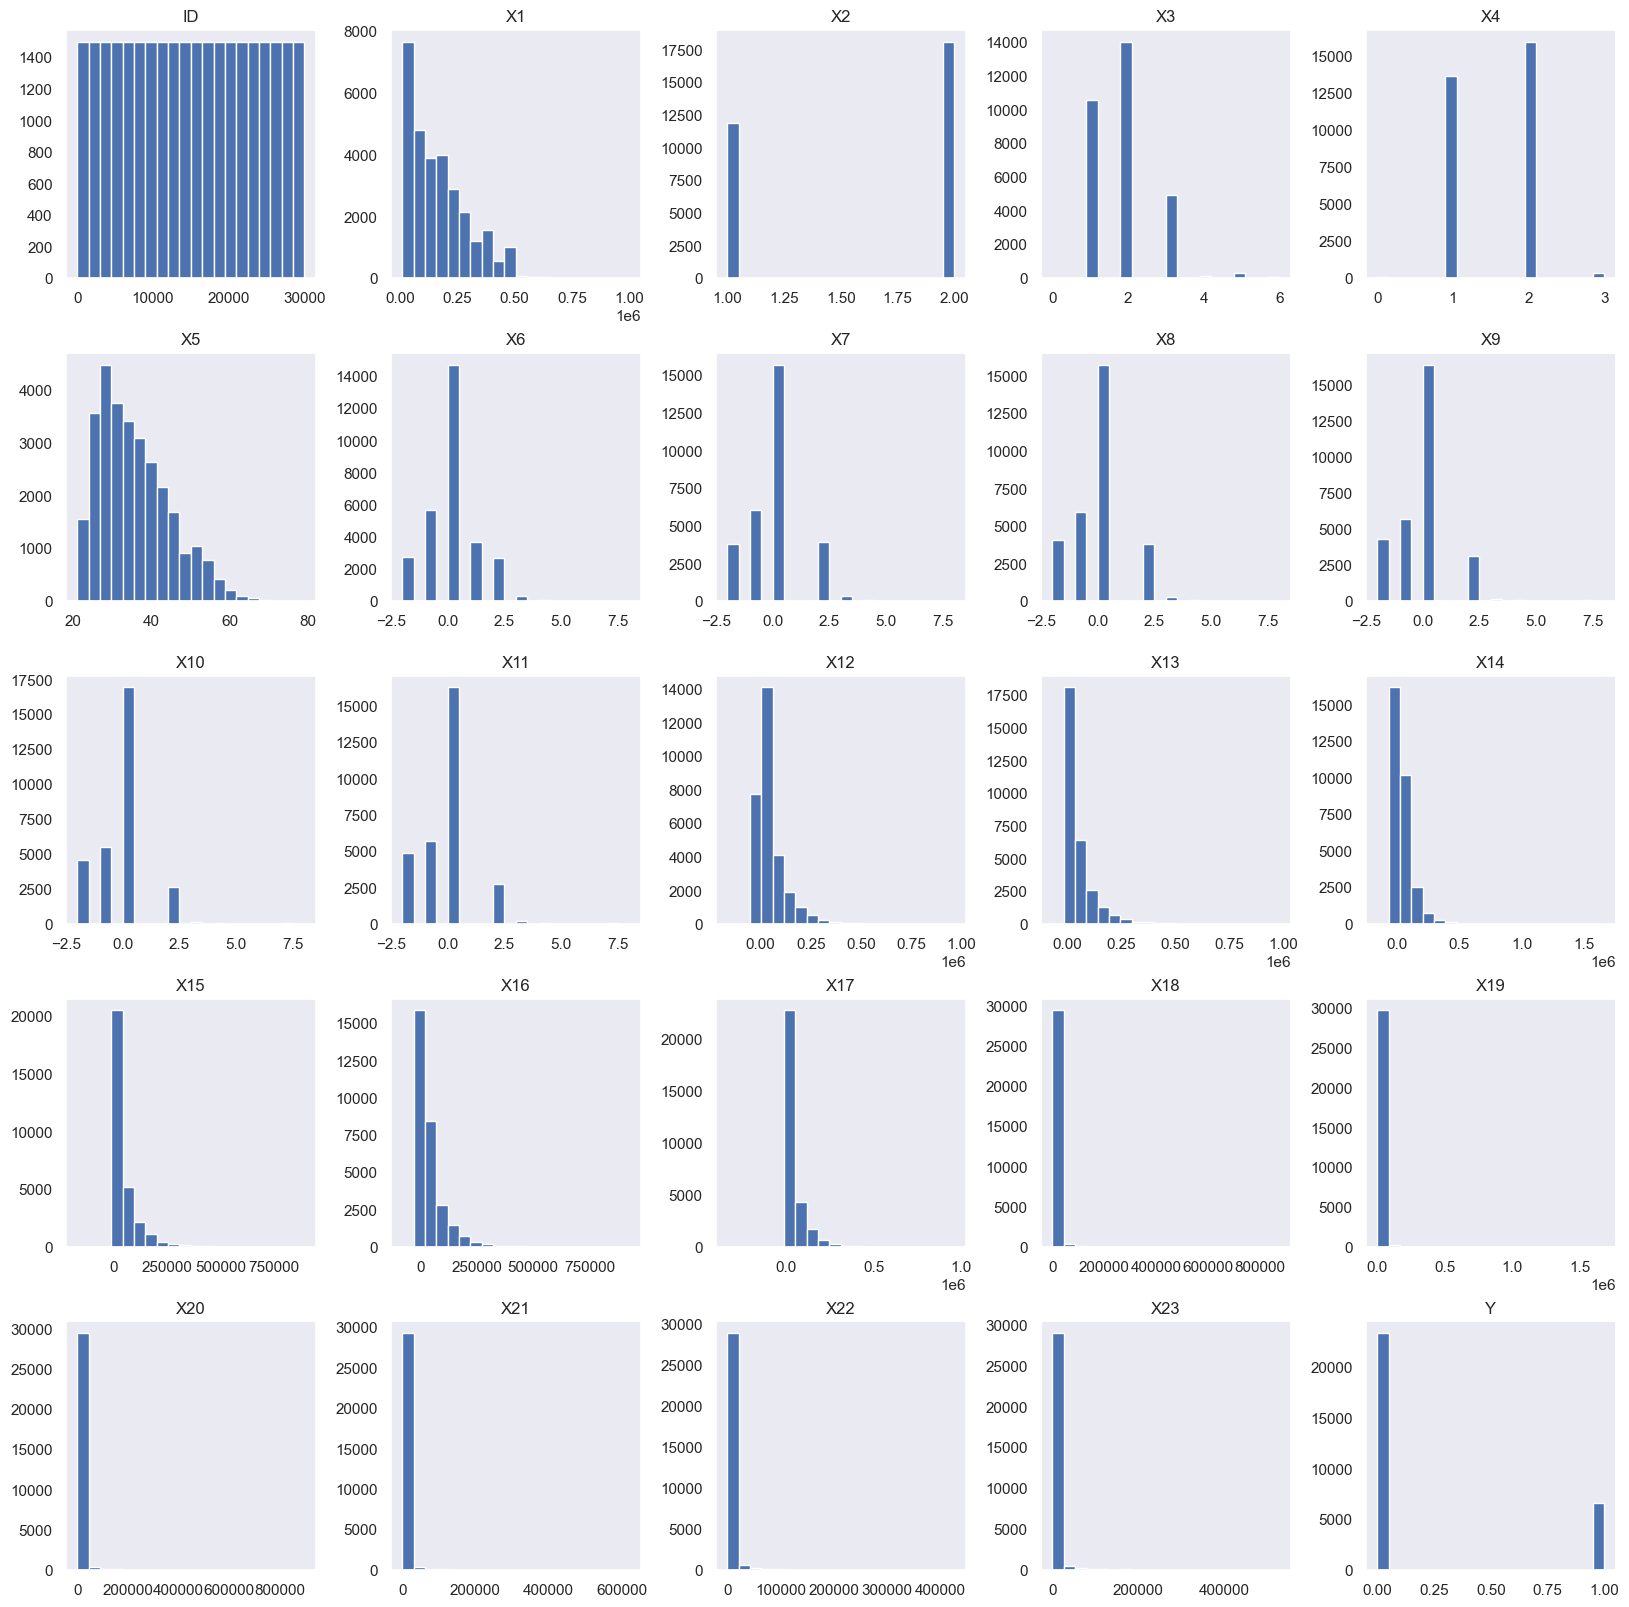

In [47]:
df.hist(bins= 20, figsize=(20,20), grid=False)

Como vemos en la descripción de las columnas, las restantes de X10 a X23 son valores numericos de pago de cada uno de los periodos entonces no es tan conveniente usar el promedio para poder llenar los pocos datos faltantes sino que lo que tocaría hacer sería la moda ya que se ve que son valores que mantendrán la función de masa de probabilidad para sus valores.

array([[<AxesSubplot: title={'center': 'ID'}>,
        <AxesSubplot: title={'center': 'X1'}>,
        <AxesSubplot: title={'center': 'X2'}>,
        <AxesSubplot: title={'center': 'X3'}>,
        <AxesSubplot: title={'center': 'X4'}>],
       [<AxesSubplot: title={'center': 'X5'}>,
        <AxesSubplot: title={'center': 'X6'}>,
        <AxesSubplot: title={'center': 'X7'}>,
        <AxesSubplot: title={'center': 'X8'}>,
        <AxesSubplot: title={'center': 'X9'}>],
       [<AxesSubplot: title={'center': 'X10'}>,
        <AxesSubplot: title={'center': 'X11'}>,
        <AxesSubplot: title={'center': 'X12'}>,
        <AxesSubplot: title={'center': 'X13'}>,
        <AxesSubplot: title={'center': 'X14'}>],
       [<AxesSubplot: title={'center': 'X15'}>,
        <AxesSubplot: title={'center': 'X16'}>,
        <AxesSubplot: title={'center': 'X17'}>,
        <AxesSubplot: title={'center': 'X18'}>,
        <AxesSubplot: title={'center': 'X19'}>],
       [<AxesSubplot: title={'center': 'X20'}>

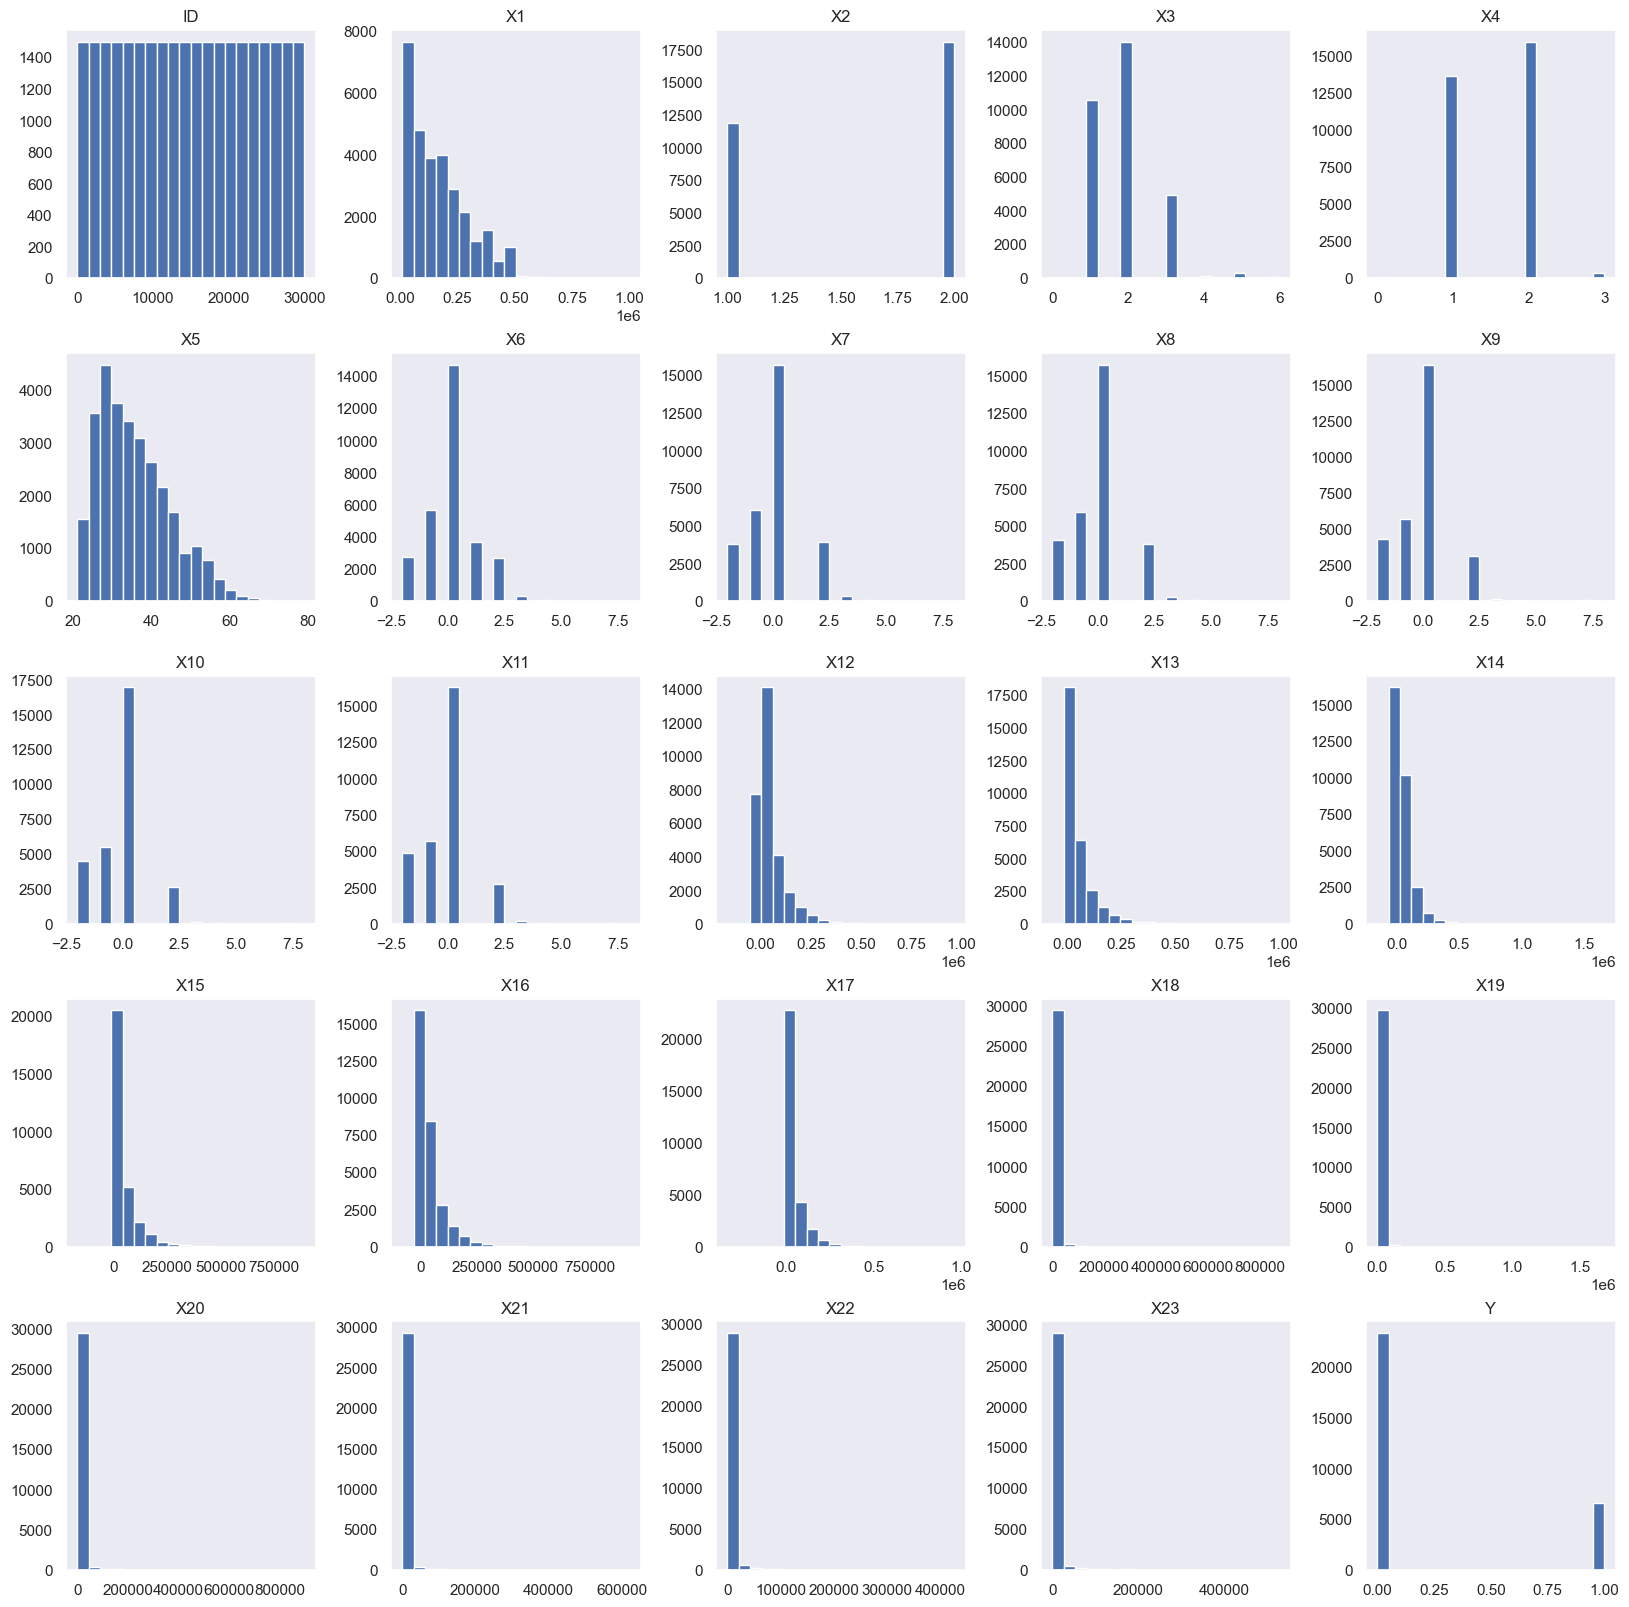

In [64]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy= 'median')
new_df = imputer.fit_transform(df)
new_df = pd.DataFrame(new_df, columns=df.columns).reset_index().drop('index', axis=1)
new_df.hist(bins= 20, figsize=(20,20), grid=False)

In [65]:
new_df.isna().sum()

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

Listo!

Los datos ya no tienen valores nulos o vacíos y mantuvimos el comportamiento confirmando con los histogramas de la trasformación usando la media para no alterar su función masa de probabilidad.

## Parte 3: Preparación de los datos:

1. ¿Qué datos considero mas importantes? ¿Por qué?

Se tomaron muy encuenta los datos que describian las columnas de $X1$ a $X9$ debido a que son datos de identificación, este tipo de datos al describir a cada una de nuestras observaciones se tiene dar mayor importancia ya que al momento de que nuestro modelo quiera ser puesto aprueba estos datos son los primeros que va a ver. También el valor $Y$ a predecir y con eso logramos asegurar que nuestro modelo tenga buenos parámetros para poder hacer las predicciones.

2. ¿Se eliminaron o reemplazaron datos nulos? ¿Qué se hizo y por qué?

De las columnas de identificación fueron eliminados los datos nulos debido a que son datos que su imputación alteraria la medida que se toma para la predicción y también los datos de $Y$ que eran nulos fueron eliminados ya que necesitamos la mayor certeza en una prueba supervisada y tenemos suficientes datos no nulos para poder disponer de ellos.

Los datos que si fueron reemplzados fueron los montos y peridodicidades de pago los cuales al ser valores continuos son más fáciles de poder imputar y no perder información en el modelaje.

3. ¿Es necesario ordenar los datos para el análisis? Sí / No / ¿Por qué?

Sí en el caso de los valores continuos para poder ver si es que hay alguna tendencia que no se esté viendo a simple vista. Esto se hace con el histograma ya que este método los ordena, los gráfica y nos da su función para concer si es que hay alguna tendencia de los datos para ser tomada en cuenta.

4. ¿Existen problemas de formato que deban solucionar antes del proceso de modelado? Sí / No / Por qué.

En este caso no en formato ya que es númerico e incluye un diccionario para poderlo entender, lo que sí se tendría que ver sería una transformación de los datos ya que los valores son muy grandes algunos de ellos y esto podría hacer que a comparación de los otros, sesgen el resultado.

5. ¿Qué ajustes se realizaron en el proceso de limpieza de datos (agregar, integrar, eliminar, modificar registros (filas), cambiar atributos (columnas)?

Primero se hizo un análisis para ver el número de nulos que había, se revisó el significado de las columnas y con base en eso se pudo elegir cuales valores eliminar, después se vió que ya eran mucho menores los nulos faltantes y al ver su gráfica de distribución se decidió tomar la mediana para poder imputar los datos debido a que una media podría no ser tan conveniente por sus valores extremos. Al final esto nos deja sin valores nulos y manteniendo la distribución de las columnas.
